<a id='top_of_page'></a>
# Project: Investigation a Dataset of Medical Appointment No-shows

## Table of Contents
<ul>
<li><a href="#1.0_intro"> <b>1) Introduction</b> </a></li>
    <ul>
    <li><a href="#1.1_dataset_overview">1.1) Dataset Overview</a></li>
    <li><a href="#1.2_dataset_columns">1.2) Dataset Columns</a></li>
    <li><a href="#1.3_objective_and_questions">1.3) Analysis Objective, Scope, and Questions</a></li>
    <li><a href="#1.4_settingUpEnvironment">1.4) Setting up the Notebook Environment</a></li>
    </ul>
<li><a href="#2.0_wrangling"> <b>2) Data Wrangling</b> </a></li>
    <ul>
    <li><a href="#2.1_general_properties">2.1) General Properties</a></li>
    <li><a href="#2.2_check_cleanliness">2.2) Check Data Cleanliness</a></li>
    <li><a href="#2.3_clean_data">2.3) Clean Data</a></li>
    <li><a href="#2.4_add_features">2.4) Add New Features</a></li>
    <li><a href="#2.5_Perform_Additional_data_cleaning">2.5) Perform Additional Data Cleaning</a></li>
    </ul>
<li><a href="#3.0_eda"> <b>3) Exploratory Data Analysis</b> </a></li>
    <ul>
    <li><a href="#3.1_data_exploration">3.1) Top Level</a></li>
    <li><a href="#3.2_research_question">3.2) Research Question 1</a></li>
    <li><a href="#3.3_research_question">3.3) Research Question 2</a></li>
    <li><a href="#3.4_research_question">3.4) Research Question 3</a></li>
    </ul>
<li><a href="#4.0_summary"> <b>4) Summary</b> </a></li>
    <ul>
    <li><a href="#4.1_limits_of_analysis">4.1) Limits of Analysis</a></li>
    <li><a href="#4.2_conclusions">4.2) Conclusions</a></li>
    </ul>
</ul>

<a id='1.0_intro'></a>
## 1) Introduction
<ul> <a href="#top_of_page">Top of Page</a> </ul>

<a id='1.1_dataset_overview'></a>
### 1.1) Dataset Overview:
<ul> <a href="#top_of_page">Top of Page</a> </ul>

I selected a dataset which contains information from over 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The dataset can be found at the following link:
*  https://www.kaggle.com/joniarroba/noshowappointments

<a id='1.2_dataset_columns'></a>
### 1.2) Dataset Columns:
<ul> <a href="#top_of_page">Top of Page</a> </ul>

The [source website](https://www.kaggle.com/joniarroba/noshowappointments) describes the data columns as indicated in the bullets below. I modified the column descriptions for grammar, spelling, and clarity. I will perform validity checks on the columns and their values during the Data Wrangling and Data Exploration phases.

Column Decriptions:
* PatientId = Identification of a patient
* AppointmentID = Identification of each appointment
* Gender = Male or Female 
* ScheduledDay = The day of the actual appointment, when they have to visit the doctor.
* AppointmentDay = The day someone called or registered the appointment.
* Age = How old is the patient.
* Neighbourhood = Where the appointment takes place
* Scholarship = True or False
* Hipertension = True or False 
* Diabetes = True or False
* Alcoholism = True or False
* Handcap = The # of disabilities a person has (as [explained here](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699) by the dataset creator)
* SMS_received = 1 or more messages sent to the patient
* No-show = True or False

<a id='1.3_objective_and_questions'></a>
### 1.3) Analysis Objective, Scope, and Questions:
<ul> <a href="#top_of_page">Top of Page</a> </ul>

* **Analysis Objective:**
  * The primary goal of this report is to analyze how various parameters (assumed to be independent variables) do or do not correlate to the 'No-show' parameter (assumed to be a dependent variable).
* **Scope and Approach:**
  * Assessments of correlation in this report will be based primarily on plots and descriptive statistics. As such, all findings herein will be subjective and do not imply causation between parameters.
* **To address the analysis objective, there are a couple of questions I plan to explore in this report:**
  1. Is there a relationship between (Appointment day-of-week) and 'No-show'?
     * plot daily no-show percentage vs. appointment day of week
         * daily no-show percentage = # of no-shows that day / # of appointments that day
     * plot % of 
  2. Is there a relationship between 'timeWaiting' (i.e., the # of days between 'ScheduledDay' and 'AppointmentDay') and 'No-show'?
  3. Are certain patients (young, old, male, female, etc.) more or less likely to have a 'No-show'?
     * 
  
<a id='1.4_settingUpEnvironment'></a>
### 1.4) Setting up the Notebook environment:

<ul> <a href="#top_of_page">Top of Page</a> </ul>

In [49]:
# import statements for the packages that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# allow visualizations to be plotted inline with the notebook
%matplotlib inline

<a id='2.0_wrangling'></a>
## 2) Data Wrangling
<ul> <a href="#top_of_page">Top of Page</a> </ul>


<a id='2.1_general_properties'></a>
### 2.1) General Properties:
<ul> <a href="#top_of_page">Top of Page</a> </ul>

In [50]:
# Loading the dataset and printing out a few lines
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [51]:
# Inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Initial Observations:
* The columns 'ScheduledDay' and 'AppointmentDay' appear as strings, but should likely be timestamps.
* The following columns should be checked to see if they are always 0 or 1:
  * Scholarship
  * Hipertension
  * Diabetes
  * Alcoholism
  * Handcap
  * SMS_received 

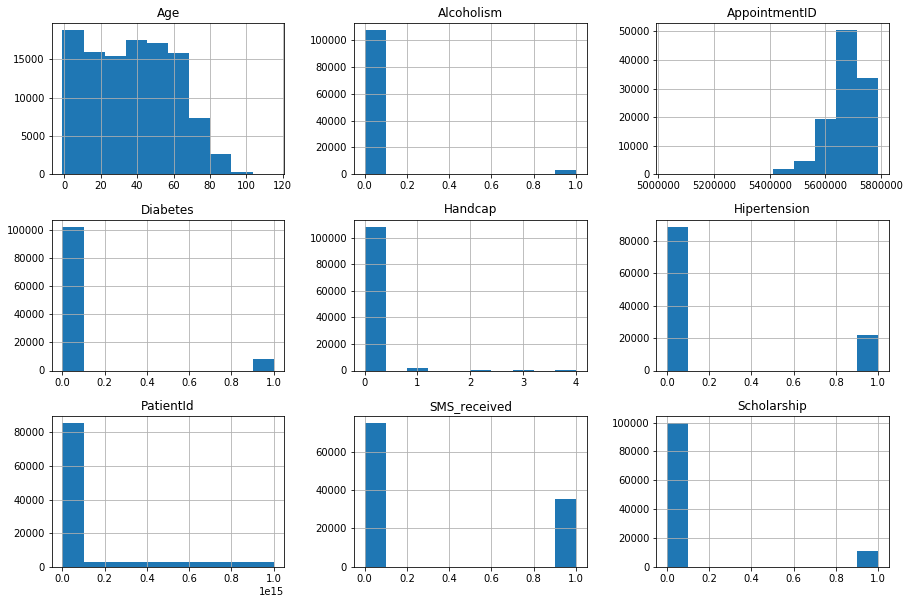

In [52]:
df.hist(figsize=(15,10));

#### Observations:
* All of the columns mentioned in "Initial Observations" consist of only 1 or 0, except for the 'Handcap' column.
* Columns not explored by the hist function (i.e., non-int and non-float columns):
  * ['Gender', ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show']

<a id='2.2_check_cleanliness'></a>
### 2.2) Check Data Cleanliness:
<ul> <a href="#top_of_page">Top of Page</a> </ul>

#### Check for Null entries

In [53]:
# view missing value count for each feature
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

---> columns do not have any null entries

#### Check for possible existence of different values than 'M' or 'F' in the 'Gender' column

In [54]:
print(df['Gender'].value_counts())

F    71840
M    38687
Name: Gender, dtype: int64


#### Check for possible existence of different values than 'Yes' or 'No' in the 'No-show' column

In [55]:
print(df['No-show'].value_counts())

No     88208
Yes    22319
Name: No-show, dtype: int64


---> 'Gender' and 'No-show' columns are clean (i.e., each consists of the two values advertised)

#### Check for Duplicates

In [56]:
df.duplicated().sum()

0

---> There are no duplicated rows

#### Summary of cleanliness checks:
* The data set has been checked for the possible existence of:
  * [x] Null entries in any column
  * [x] Different values than 'M' or 'F' in the 'Gender' column
  * [x] Different values than 'Yes' or 'No' in the 'No-show' column
  * [x] Duplicate rows
* The data did not need fixed for any of the above issues


<a id='2.3_clean_data'></a>
### 2.3) Clean Data:
<ul> <a href="#top_of_page">Top of Page</a> </ul>

* **Convert ScheduledDay and AppointmentDay to 'datetime', then append '..._date' to the column names**
  * 'datetime' has built in methods that will enable better analysis and the creation of additional features / parameters
  * Appending '..._date' will avoid confusion with similar columns that are going to be added later
* **Convert PatientId from float to int**
  * Int is more appropriate than float for this parameter
* **Rename 'No-show' column to 'No_show'**

In [57]:
# Convert ScheduledDay and AppointmentDay to type 'datetime'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Convert PatientId from float to int
df['PatientId'] = df['PatientId'].astype(int)

# Rename columns
df.rename(columns={'ScheduledDay':'ScheduledDay_date'}, inplace=True)
df.rename(columns={'AppointmentDay':'AppointmentDay_date'}, inplace=True)
df.rename(columns={'No-show':'No_show'}, inplace=True)

#### Confirm that data types and names were updated correctly:

In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId              110527 non-null int64
AppointmentID          110527 non-null int64
Gender                 110527 non-null object
ScheduledDay_date      110527 non-null datetime64[ns, UTC]
AppointmentDay_date    110527 non-null datetime64[ns, UTC]
Age                    110527 non-null int64
Neighbourhood          110527 non-null object
Scholarship            110527 non-null int64
Hipertension           110527 non-null int64
Diabetes               110527 non-null int64
Alcoholism             110527 non-null int64
Handcap                110527 non-null int64
SMS_received           110527 non-null int64
No_show                110527 non-null object
dtypes: datetime64[ns, UTC](2), int64(9), object(3)
memory usage: 11.8+ MB


<a id='2.4_add_features'></a>
### 2.4) Add new features:
<ul> <a href="#top_of_page">Top of Page</a> </ul>

* **Add '\_num' columns corresponding to Scheduled and Appointment dates**
  * AppointmentDay_num and ScheduledDay_num = The day of the week with Monday=0, Sunday=6
* **Add Number of days spent waiting between 'Scheduled' and 'Appointment' times**
  * 'timeWaiting' = number of days between 'ScheduledDay_date' and 'AppointmentDay_date'

In [59]:
# Add '_num' columns corresponding to Scheduled and Appointment dates
df['ScheduledDay_num'] = df['ScheduledDay_date'].dt.dayofweek
df['AppointmentDay_num'] = df['AppointmentDay_date'].dt.dayofweek

# determine the timedelta for time between Scheduled and Appointment
df['timeWaiting'] = df['AppointmentDay_date'] - df['ScheduledDay_date']

# convert timedelta from seconds to days
df['timeWaiting'] = df['timeWaiting'].dt.total_seconds() / (24 * 60 * 60)


#### Explore new data columns:

In [60]:
# show the tail of the original and new columns:
df[['ScheduledDay_date', 'AppointmentDay_date', 'ScheduledDay_num', 'AppointmentDay_num', 'timeWaiting']].tail()

,ScheduledDay_date,AppointmentDay_date,ScheduledDay_num,AppointmentDay_num,timeWaiting
110522,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,1,1,34.614178
110523,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,1,1,34.689201
110524,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,2,1,40.330648
110525,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,2,1,40.368484
110526,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,2,1,40.436852


In [61]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDay_num,AppointmentDay_num,timeWaiting
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243,9.714284
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672,15.244073
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.575926
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.346163
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.473819
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000,14.320538
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000,178.554873


In [62]:
print_cols = ['PatientId', 'AppointmentID', 'ScheduledDay_date', 'AppointmentDay_date', 'timeWaiting']
df[df['timeWaiting'] <= -1][print_cols]


,PatientId,AppointmentID,ScheduledDay_date,AppointmentDay_date,timeWaiting
27033,7839272661752,5679978,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,-1.452697
55226,7896293967868,5715660,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,-1.618530
64175,24252258389979,5664962,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,-1.572199
71533,998231581612122,5686628,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,-6.575926
72362,3787481966821,5655637,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,-1.285382


#### Observations and Issues:
* **There are rows with a negative value for 'Age'**
   * This must be an error.
* **There are rows with a negative value for 'timeWaiting'**
   * I suspect this is because times in the 'AppointmentDay_date' column all occur at the first hour/minute/second of a given day. In other words:
     * 'AppointmentDay_date' refers to the date of the appointment, not the precise time
     * ...and 'ScheduledDay_date' refers to the precise date/time when the appointment was scheduled
   * Rows where timeWaiting is between -1 and 0 can just have their 'timeWaiting' value changed to zero
   * Some rows have 'timeWaiting' < 1. This must be an error:
     * It is not possible to schedule an appointment after it has already occured
     * The 'ScheduledDay_date' and 'AppointmentDay_date' likely need swapped for these rows

<a id='2.5_Perform_Additional_data_cleaning'></a>
### 2.5) Perform Additional Data Cleaning:
<ul> <a href="#top_of_page">Top of Page</a> </ul>

#### The following data cleaning steps will be taken to correct the aformentioned issues
* **Re: 'Age'**
  * Change 'Age' to zero for rows where it has a value < 0
* **Re: 'timeWaiting':**
  * Swap 'ScheduledDay_date' and 'AppointmentDay_date' values for rows with 'timeWaiting' < -1
  * Re-calculate the corresponding derived parameters ('...\_date', '...\_num', etc.)
  * Change 'timeWaiting' to zero for rows where it would otherwise have a value between -1 and 0
  
* **Drop columns that will not be used in this analysis:**
  * 'ScheduledDay_date'
  * 'AppointmentDay_date'
  * 'Neighbourhood'

In [63]:
# Change 'Age' to zero for rows where it has a value < 0
idx = df['Age'] < 0
df.loc[idx,['Age']] = 0

# Swap 'ScheduledDay_date' and 'AppointmentDay_date' values for rows with 'timeWaiting' < -1
idx = df['timeWaiting'] <= -1
df.loc[idx,['ScheduledDay_date','AppointmentDay_date']] = df.loc[idx,['AppointmentDay_date','ScheduledDay_date']].values

# Re-calculate the corresponding derived parameters ('..._date', '..._num', 'timeWaiting', etc.)
df['ScheduledDay_num'] = df['ScheduledDay_date'].dt.dayofweek
df['AppointmentDay_num'] = df['AppointmentDay_date'].dt.dayofweek
df['timeWaiting'] = df['AppointmentDay_date'] - df['ScheduledDay_date']  # timedelta between Scheduled and Appointment
df['timeWaiting'] = df['timeWaiting'].dt.total_seconds() / (24 * 60 * 60)  # convert timedelta to days

# Change 'timeWaiting' values to zero for rows where it would otherwise have a value between -1 and 0
idx = df['timeWaiting'] < 0
df.loc[idx,['timeWaiting']] = 0

# Drop columns that will not be needed for analysis:
df.drop(['ScheduledDay_date'], axis=1, inplace=True)
df.drop(['AppointmentDay_date'], axis=1, inplace=True)
df.drop(['Neighbourhood'], axis=1, inplace=True)

#### Verify that min 'Age' and 'timeWaiting' values are now zero:

In [64]:
cols = ['Age', 'timeWaiting']
df[cols].describe()


,Age,timeWaiting
count,110527.000000,110527.000000
mean,37.088883,9.869954
std,23.110190,15.141276
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,3.474167
75%,55.000000,14.320538
max,115.000000,178.554873


<a id='3.0_eda'></a>
## 3) Exploratory Data Analysis
<ul>
<a href="#top_of_page">Top of Page</a>
</ul>

This section will start by performing some top level data exploration, then move on to posing and analyzing specific analysis questions.


<a id='3.1_data_exploration'></a>
### 3.1) Top Level:
<ul> <a href="#top_of_page">Top of Page</a> </ul>

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId             110527 non-null int64
AppointmentID         110527 non-null int64
Gender                110527 non-null object
Age                   110527 non-null int64
Scholarship           110527 non-null int64
Hipertension          110527 non-null int64
Diabetes              110527 non-null int64
Alcoholism            110527 non-null int64
Handcap               110527 non-null int64
SMS_received          110527 non-null int64
No_show               110527 non-null object
ScheduledDay_num      110527 non-null int64
AppointmentDay_num    110527 non-null int64
timeWaiting           110527 non-null float64
dtypes: float64(1), int64(11), object(2)
memory usage: 11.8+ MB


In [66]:
df.tail()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,ScheduledDay_num,AppointmentDay_num,timeWaiting
110522,2572134369293,5651768,F,56,0,0,0,0,0,1,No,1,1,34.614178
110523,3596266328735,5650093,F,51,0,0,0,0,0,1,No,1,1,34.689201
110524,15576631729893,5630692,F,21,0,0,0,0,0,1,No,2,1,40.330648
110525,92134931435557,5630323,F,38,0,0,0,0,0,1,No,2,1,40.368484
110526,377511518121127,5629448,F,54,0,0,0,0,0,1,No,2,1,40.436852


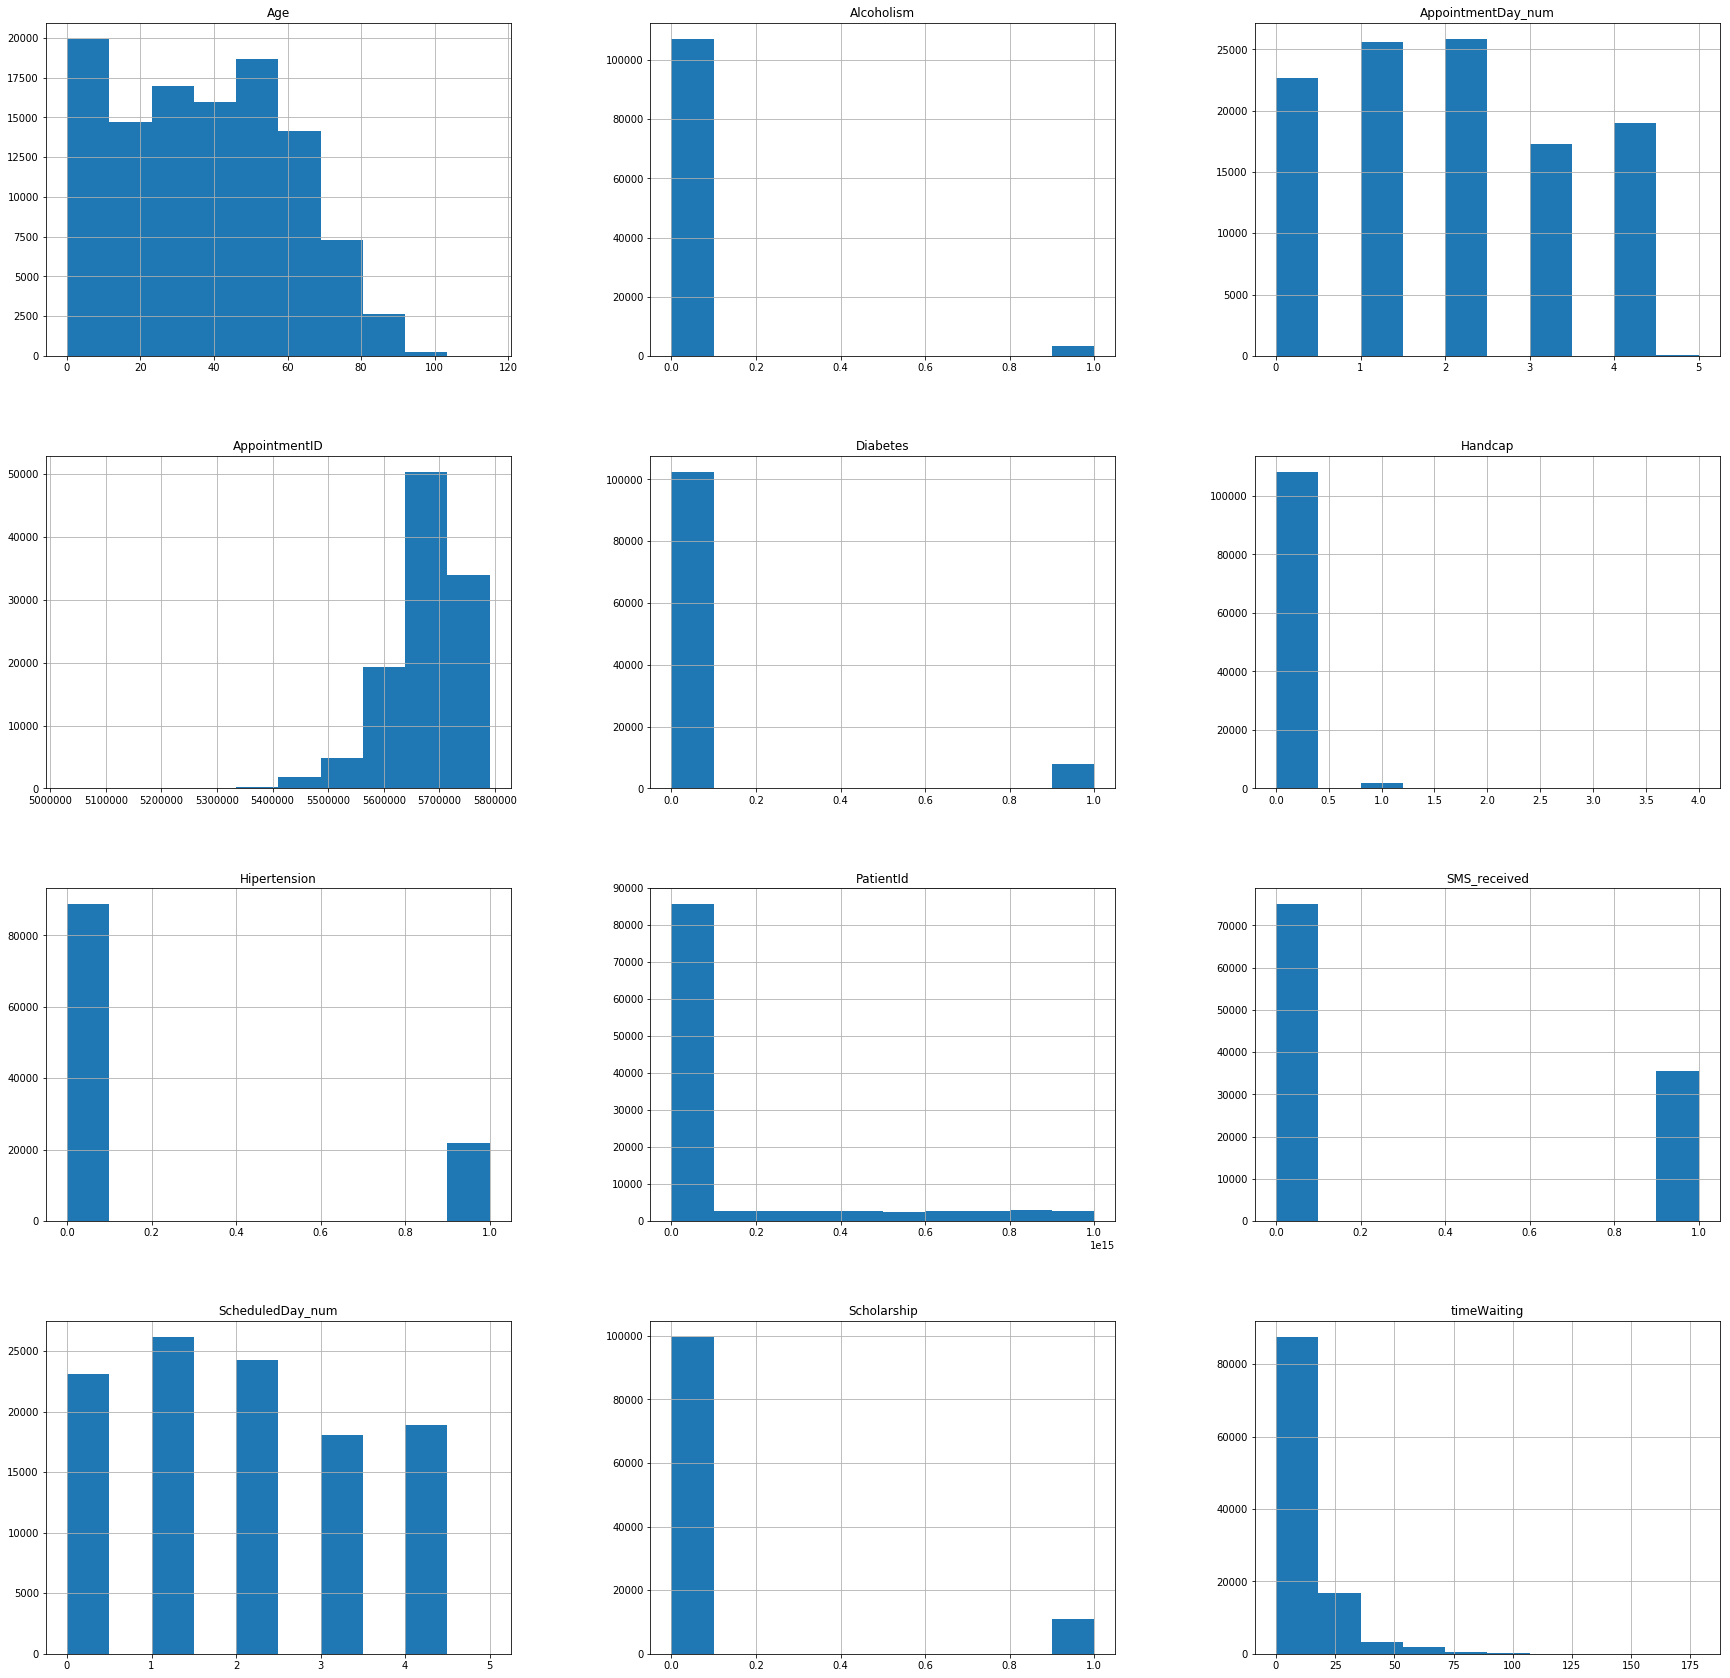

In [87]:
df.hist(figsize=(30,30));

#### Most of the parameters seemed skewed to a certain degree
#### Let's run a quick check on the data skewness:


In [68]:
df.skew()

PatientId             1.967729
AppointmentID        -1.235588
Age                   0.121660
Scholarship           2.699199
Hipertension          1.521706
Diabetes              3.315531
Alcoholism            5.470567
Handcap               8.274399
SMS_received          0.766708
ScheduledDay_num      0.182516
AppointmentDay_num    0.181725
timeWaiting           2.705653
dtype: float64

#### Observations:
* **Most of the parameters are indeed skewed**
  * This suggests multiple possibilities:
    * There may be aspects not currently in the dataset that are affecting the parameters. Some such aspects may include:
      * The type of medical appointment(s)
      * Patient's yearly salary
      * Patient's diet
      * Commute time between patient's home and the location of the medical appointment
      * Patient's family medical history
      * etc.
    * The skewed nature of the parameter distributions could also be indicative of other statistical characteristics:
      * The distribution(s) are only a sample of the real-world dataset
        * i.e., There are a lot of appointments not IN this dataset, and a given sample set may not be representative of the overall dataset
      * A given parameter may naturally have a skewed distribution
        * i.e., not every distribution is normal
* **Columns skewed to the left:**
  * 'AppointmentID'
* **Columns skewed to the right:**
  * All others
* **Columns with (relatively) little skew:**
  * 'Age'
  * 'ScheduledDay_num'
  * 'AppointmentDay_num'

#### Define boolean masks based on 'No_show' value (to be used for subsequent analyses):

In [69]:
noShow = df['No_show'] == 'Yes'   # contains 22319 'True' values
didShow = df['No_show'] == 'No'   # contains 88208 'True' values


<a id='3.2_research_question'></a>
### 3.2) Research Question 1:  Is there a relationship between (Appointment day-of-week) and 'No-show'?
<ul> <a href="#top_of_page">Top of Page</a> </ul>

### 3.2.1) Bar Chart
#### Create a Bar Chart to visualize % of no shows vs. Day of Week
* To ascertain the % of no shows, convert 'No_show' to 0's and 1's
* Upon grouping by 'AppointmentDay_num' and taking the mean of that grouping, the mean values for 'No_show' will represent the % of no shows

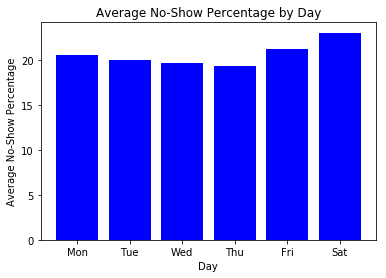

In [70]:
# Convert 'No_show' column to type int
idx = df['No_show'] == 'Yes'
df.loc[idx,['No_show']] = 1
idx = df['No_show'] == 'No'
df.loc[idx,['No_show']] = 0

# Create the plot
dayOfWeek = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
y = df.groupby('AppointmentDay_num').No_show.mean() * 100
plt.bar(dayOfWeek, y, color="blue")
plt.title('Average No-Show Percentage by Day')
plt.xlabel('Appointment Day')
plt.ylabel('Average No-Show Percentage');


<span style="color:green">
    
### * Day '5' (Saturday) has the highest average no-show percentage
### * Day '4' (Friday) also has a high average no-show percentage
</span>

### 3.2.2) Line Chart
#### A Line Chart might show the same data in a more intuitive fashion:

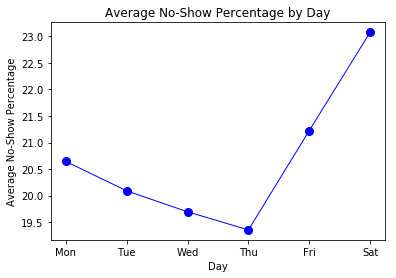

In [71]:
# Group by 'Appointment' groupby to get the mean noShow values
mean_noShow = df.groupby('AppointmentDay_num').mean()
mean_noShow['ApptDayOfWeek'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Create a line plot
x = mean_noShow.ApptDayOfWeek
y = mean_noShow.No_show * 100
plt.plot(x, y, color='blue', marker='o', linestyle='solid', linewidth=1, markersize=8)
plt.title('Average No-Show Percentage by Day')
plt.xlabel('Appointment Day')
plt.ylabel('Average No-Show Percentage');


<span style="color:green">
    
### While it does not show any different data than the bar plot, the line plot does better visualize how the average No-show percentage changes based on appointment day-of-week
</span>

### 3.2.3) Normalized Bar Chart
#### Another way to analyze this is to compare a given day's no-show percentage to the average (overall) no-show percentage:
It is possible to "normalize" the daily data points by:
* Calculating the difference between that data point and the mean
* Then dividing the result by the standard deviation
* This returns a set of values indicating how many standard deviations each original (daily avg) value is above the overall (weekly) average

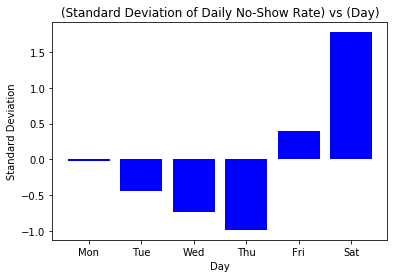

In [72]:
# Normalize the daily no show rate with respect to its standard deviation:
noShowDailyPercentage = df.groupby('AppointmentDay_num').No_show.mean() * 100
noShowDailyPercentage_normal = (noShowDailyPercentage - noShowDailyPercentage.mean()) / noShowDailyPercentage.std()

# plot the normalized values
plt.bar(dayOfWeek, noShowDailyPercentage_normal, color="blue")
plt.title('(Standard Deviation of Daily No-Show Rate) vs (Day)')
plt.xlabel('Day')
plt.ylabel('Standard Deviation');

<span style="color:green">
    
### * This plot more clearly indicates that there is a correlation between no-show percentage and appointment day of the week
### * The rate of no-shows increases for Friday and Saturday appointments, with Saturdays having the highest rate of no-shows
</span>

<a id='3.3_research_question'></a>
### 3.3) Research Question 2:  Is there a correlation between 'timeWaiting' (# of days between 'ScheduledDay' and 'AppointmentDay') and 'No_show'?
<ul> <a href="#top_of_page">Top of Page</a> </ul>

### 3.3.1) Histograms
#### Plot Histograms of 'timeWaiting' for patients that did show and patients that did not show:
* To ascertain the % of no shows, convert 'No_show' to 0's and 1's
* Upon grouping by 'AppointmentDay_num' and taking the mean of that grouping, the mean values for 'No_show' will represent the % of no shows

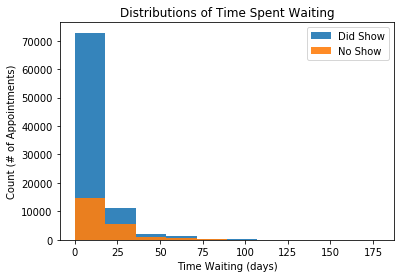

In [81]:
fig, chart_var = plt.subplots(figsize=(6,4))
chart_var.hist(df.timeWaiting[didShow], alpha=0.9, label='Did Show')
chart_var.hist(df.timeWaiting[noShow], alpha=0.9, label='No Show')
chart_var.set_title('Distributions of Time Spent Waiting')
chart_var.set_xlabel('Time Waiting (days)')
chart_var.set_ylabel('Count (# of Appointments)')
chart_var.legend(loc='upper right')
plt.show();

<span style="color:green">
    
### * Compared to patients who did show, no-show patients had a longer amount of time between their ‘scheduled’ and ‘appointment’ dates 
### * However, each histogram is highly skewed. So let's look at some other measures of center and shape to support or refute this observation.
</span>

### 3.3.2) Simple Statistics
#### Check some measures of center and shape:

In [75]:
print('----------------------Did Show----------------------')
print('skewness:', df.timeWaiting[didShow].skew())
print('kurtosis:', df.timeWaiting[didShow].kurt())
print('')
print('--------------------Did Not Show--------------------')
print('skewness:', df.timeWaiting[noShow].skew())
print('kurtosis:', df.timeWaiting[noShow].kurt())
print('')
print('---------df.timeWaiting[didShow].describe()---------')
print(df.timeWaiting[didShow].describe())
print('')
print('----------df.timeWaiting[noShow].describe()---------')
print(df.timeWaiting[noShow].describe())

----------------------Did Show----------------------
skewness: 2.977071187959332
kurtosis: 14.16018349653138

--------------------Did Not Show--------------------
skewness: 2.180960811053592
kurtosis: 9.06944038866526

---------df.timeWaiting[didShow].describe()---------
count    88208.000000
mean         8.475037
std         14.429223
min          0.000000
25%          0.000000
50%          1.622731
75%         11.642998
max        178.553681
Name: timeWaiting, dtype: float64

----------df.timeWaiting[noShow].describe()---------
count    22319.000000
mean        15.382875
std         16.565106
min          0.000000
25%          3.449647
50%         10.321192
75%         22.655938
max        178.554873
Name: timeWaiting, dtype: float64


<span style="color:green">
    
### Measures of center and shape support the observation that patients who did not show tended to spend a longer amount of time waiting than patients who did show.
* The distribution of those who did not show is less skewed to the right and has a lower kurtosis
* The mean wait time for those who did not show is higher than those who did
</span>

### 3.3.3) Bar Plot / multi-variate comparison
#### * Plot 'timeWaiting' and 'No_show' against another parameter to see if there are any trends
#### * Groupby 'Handcap' and 'No_show' to create a multi-variate comparison:


In [91]:
# Convert 'No_show' back to string values for clarity purposes:
idx = df['No_show'] == 1
df.loc[idx,['No_show']] = 'No Show'
idx = df['No_show'] == 0
df.loc[idx,['No_show']] = 'Did Show'

# groupby multiple columns
grouped_df = df.groupby(['Handcap', 'No_show'])

# Then unstack the grouped dataframe to enable easier / better plotting:
filtered_grouped_df = grouped_df.aggregate('mean').unstack()

#### Plot for the desired columns:

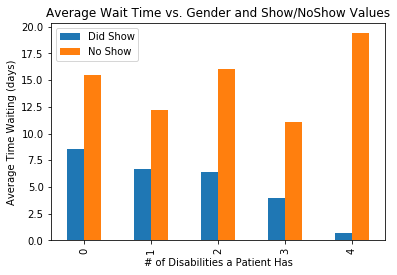

In [92]:
filtered_grouped_df['timeWaiting'].plot(kind = 'bar', title = 'Average Wait Time vs. Gender and Show/NoShow Values')
plt.ylabel('Average Time Waiting (days)')
plt.xlabel('# of Disabilities a Patient Has')
plt.legend(loc='upper left')
plt.show()


<span style="color:green">
    
### * For patients that did show, the averge wait time decreases as the number of disabilities increases
### * For patients with four disabilities, there was a large difference in wait times between those that showed and those that did not show.
* As 'timeWaiting' increases, it is possible that patients with several disabilities are less likely to show up to their appointment. This possibility bears further analysis (beyond the scope of the current report)
</span>

<a id='3.4_research_question'></a>
### 3.4) Research Question 3:  Are certain patients (young, old, male, female, etc.) more or less likely to have a 'No-show'?
<ul> <a href="#top_of_page">Top of Page</a> </ul>

### 3.4.1) Histograms
#### Plot Histograms of 'Age' for patients that did show and patients that did not show

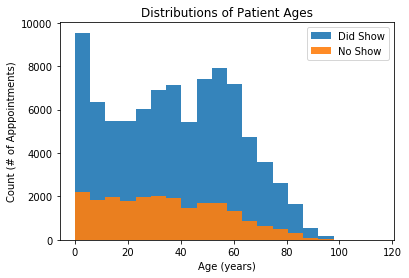

In [88]:
fig, chart_var = plt.subplots(figsize=(6,4))
chart_var.hist(df.Age[didShow], alpha=0.9, bins=20, label='Did Show')
chart_var.hist(df.Age[noShow], alpha=0.9, bins=20, label='No Show')
chart_var.set_title('Distributions of Patient Ages')
chart_var.set_xlabel('Age (years)')
chart_var.set_ylabel('Count (# of Apppointments)')
chart_var.legend(loc='upper right')
plt.show();

<span style="color:green">
    
### * Based on the distribution histograms, it appears that patients who did not show were slightly younger (on average) than patients who did show.

### * Since the histograms are skewed and have different scales, let's look at some other measures of center and shape to support or refute this observation.
</span>

### 3.4.2) Simple Statistics

#### Check some measures of center and shape:

In [89]:
print('----------------------Did Show----------------------')
print('skewness:', df.Age[didShow].skew())
print('kurtosis:', df.Age[didShow].kurt())
print('')
print('--------------------Did Not Show--------------------')
print('skewness:', df.Age[noShow].skew())
print('kurtosis:', df.Age[noShow].kurt())
print('')
print('---------df.Age[didShow].describe()---------')
print(df.Age[didShow].describe())
print('')
print('----------df.Age[noShow].describe()---------')
print(df.Age[noShow].describe())

----------------------Did Show----------------------
skewness: 0.06897036385435201
kurtosis: -0.9843761779958546

--------------------Did Not Show--------------------
skewness: 0.327782552546731
kurtosis: -0.7267498147139024

---------df.Age[didShow].describe()---------
count    88208.000000
mean        37.790076
std         23.338860
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

----------df.Age[noShow].describe()---------
count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64


<span style="color:green">
    
### Simple statistics may support the observation that patients who did not show were slightly younger (on average) than patients who did show. 
* Specifically, 'noShow' patients have a lower mean age and lower age values for the 25%, 50%, and 75% quartiles.
* The 'noShow' histogram is also more skewed towards patients with lower ages
   * However, this skew may be an indicator that the given sample population is not representative of the overall population. This may deserve more in-depth statistical analysis in the future
</span>


### 3.4.3) Bar Plot / multi-variate comparison
In reponse to Research Question 3: Are certain patients (young, old, male, female, etc.) more or less likely to have a 'No-show'?
#### * Plot average age and 'No_show' against another parameter to see if there are any trends.
#### * Groupby 'Gender' and 'No_show' to create a multi-variate comparison:


#### Now, let's do the same thing for gender:

In [111]:
# Convert 'SMS_received' to Yes and No values for clarity purposes:
idx = df['SMS_received'] == 1
df.loc[idx,['SMS_received']] = 'Yes'
idx = df['SMS_received'] == 0
df.loc[idx,['SMS_received']] = 'No'

df.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,ScheduledDay_num,AppointmentDay_num,timeWaiting
0,29872499824296,5642903,F,62,0,1,0,0,0,No,No,4,4,0.0
1,558997776694438,5642503,M,56,0,0,0,0,0,No,No,4,4,0.0
2,4262962299951,5642549,F,62,0,0,0,0,0,No,No,4,4,0.0
3,867951213174,5642828,F,8,0,0,0,0,0,No,No,4,4,0.0
4,8841186448183,5642494,F,56,0,1,1,0,0,No,No,4,4,0.0


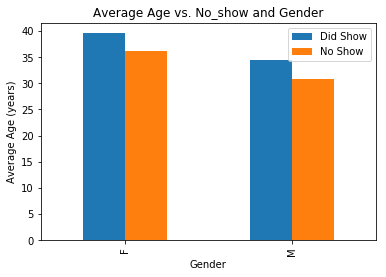

In [93]:
#Groupby 'SMS_received' and 'No_show' to create some multi-variate comparisons
#grouped_df = df.groupby(['Age', 'Gender'])
grouped_df = df.groupby(['Gender', 'No_show'])
grouped_df.mean()

#Unstack the resulting dataframe to enable easier / better plotting:
filtered_grouped_df = grouped_df.aggregate('mean').unstack()
filtered_grouped_df

#plot
#filtered_grouped_df['Age'].plot(kind = 'bar', title = 'Average Age vs. No_show and SMS_received')
filtered_grouped_df['Age'].plot(kind = 'bar', title = 'Average Age vs. No_show and Gender')
plt.ylabel('Average Age (years)')
plt.legend(loc='upper right')
plt.show()


# filtered_grouped_df['timeWaiting'].plot(kind = 'bar', title = 'Average Wait Time vs. Gender and Show/NoShow Values')
# plt.ylabel('Average Time Waiting (days)')
# plt.show()

<span style="color:green">
    
### * Male patients tend to be younger than female patients
### * No show patients tend to be younger than patients who did show, regardless of gender
### * The rate of “no shows” vs. “did shows” is approximately the same for each gender
</span>

### Analysis Objective and Questions:
* The primary goal of this report is to analyze how various parameters (assumed to be independent variables) do or do not correlate to the 'No-show' parameter (assumed to be a dependent variable).
---
* **As such, there are a couple of questions I plan to explore over the course of this report:**
  1. Is there a correlation between (Appointment day-of-week) and (value of 'No-show')?
  2. Is there a correlation between (# of days between 'ScheduledDay' and 'AppointmentDay') and the (value of 'No-show')?
  3. Are certain patients (male, female, young, old, etc.) more or less likely to have a 'No-show'?

#### Thoughts on how and what to analyze:
* **Groupings and/or boolean masks to be considered for analysis:**
  * df['Gender'] == 'M'
  * df['Gender'] == 'F'
  * groupBy 'Neighbourhood'
  * df['No-show'] == 'Yes'
  * df['No-show'] == 'No'
  * scatter-gram:  (number of days between scheduled and appointment) vs (No-shows)

* **Numerous date / time aspects can be analyzed as possible independent variables. This may involve adding new features to the dataset.**
  * Aspects (features?) that could be explored:
    * Appointment day-of-week (Mon, Tue, etc.)
    * Scheduled day-of-week (Mon, Tue, etc.)
    * Number of days between Scheduled and Appointment
    * Appointment time of day
    * Scheduled time of day

<a id='4.0_summary'></a>
## 4) Summary
<ul> <a href="#top_of_page">Top of Page</a> </ul>


<a id='4.1_limits_of_analysis'></a>
### 4.1) Limits of Analysis
<ul> <a href="#top_of_page">Top of Page</a> </ul>

* As stated previously (see “scope” section), the findings herein are based primarily on plots and descriptive statistics, are considered subjective, and do not imply causation between parameters.
* The conclusions above are not intended to be exhaustive or definitive (i.e., the data set could easily be subject analyzed at greater length).

<a id='4.2_conclusions'></a>
### 4.2) Conclusions
<ul> <a href="#top_of_page">Top of Page</a> </ul>

1. The rate of no-shows increases for Friday and Saturday appointments, with Saturdays having the highest rate of no-shows.
2. Compared to patients who did show, no-show patients had a longer amount of time between their ‘scheduled’ and ‘appointment’ dates.
3. For patients that did show, the average wait time decreases as the number of disabilities increases.
4. For patients with four disabilities, there was a large difference in wait times between those that showed and those that did not show.
   * As 'timeWaiting' increases, it is possible that patients with several disabilities are less likely to show up to their appointment. This possibility bears further analysis (beyond the scope of the current report).
5. Patients who did not show were slightly younger (on average) than patients who did show.
6. Male patients tend to be younger than female patients.
7. No show patients tend to be younger than patients who did show, regardless of gender.
8. The rate of “no shows” vs. “did shows” is approximately the same for each gender.


#### 3.2) Is there a relationship between (Appointment day-of-week) and 'No-show'?
#### 3.2.1) Bar Chart:
* Day '5' (Saturday) has the highest average no-show percentage
* Day '4' (Friday) also has a high average no-show percentage 

#### 3.2.1) Line Chart:
* While it does not show any different data than the bar plot, the line plot does better visualize how the average No-show percentage changes based on day-of-week

#### 3.2.3) Plot normalized data
* This plot indicates that there is a correlation between no-show percentage and appointment day of the week
* The rate of no-shows increases for Friday and Saturday appointments, with Saturdays having the highest rate of no-shows

#### 3.3) Research Question 2: Is there a correlation between 'timeWaiting' (# of days between 'ScheduledDay' and 'AppointmentDay') and 'No_show'?
#### 3.3.1) Histograms:
* Patients who did not show appeared to spend a slightly longer amount of time waiting (i.e., # of days between the date an appointment was scheduled and the date of the actual appointment) than patients who did show. 
* However, each histogram is highly skewed. So let's look at some other measures of center and shape to support or refute this observation.

#### 3.3.2) Simple Statistics:
* Measures of center and shape support the observation that patients who did not show tended to spend a longer amount of time waiting than patients who did show.
  * The distribution of those who did not show is less skewed to the right and has a lower kurtosis
  * The mean wait time for those who did not show is higher than those who did

#### 3.3.3) Bar Plot / multi-variate comparison:
* For patients that did show, the averge wait time decreases as the number of disabilities increases
* For patients with four disabilities, there was a large difference in wait times between those that showed and those that did not show.
  * As 'timeWaiting' increases, it is possible that patients with several disabilities are less likely to show up to their appointment. This possibility bears further analysis (beyond the scope of the current report)

#### 3.4) Research Question 3: Are certain patients (young, old, male, female, etc.) more or less likely to have a 'No-show'?    

#### 3.4.1)    Histograms
* Based on the distribution histograms, it appears that patients who did not show were slightly younger (on average) than patients who did show.
* Since the histograms are skewed and have different scales, let's look at some other measures of center and shape to support or refute this observation.

#### 3.4.2) Simple Statistics:    
* Simple statistics may support the observation that patients who did not show were slightly younger (on average) than patients who did show. 
  * Specifically, 'noShow' patients have a lower mean age and lower age values for the 25%, 50%, and 75% quartiles.
  * The 'noShow' histogram is also more skewed towards patients with lower ages
    * However, this skew may be an indicator that the given sample population is not representative of the overall population. This may deserve more in-depth statistical analysis in the future

#### 3.4.3) Bar Plot / multi-variate comparison:
* Male patients tend to be younger than female patients
* No show patients tend to be younger than patients who did show, regardless of gender
* The rate of “no shows” vs. “did shows” is approximately the same for each gender

<a id='4.2_future_work'></a>
### 4.2) Future Work
<ul> <a href="#top_of_page">Top of Page</a> </ul>

#### Some patients likely have multiple AppointmentID entries
* A potential follow-on series of questions could involve analyzing whether there is a correlation between patients that have multiple 'AppointmentIDs' and other parameters such as 'Age' or 'Gender'
  * df.nunique()

#### The 'PatientID' column bears further exploration, and possibly data cleaning / wrangling.
* It has a highly skewed distribution.
  * This may mean there are errors in the 'PatientID' values
  * It may also be a sign that there is a multi-variate distribution within the overall 'PatientID' column.
* The value of PatientID may warrant its own analysis for possible correlations to other parameters

####  Data Wrangling / Analysis to consider:
* **Split 'No_show' column into 'No_show' and 'Did_show'? columns**
* **Account for greater number of appointments during the week than on Friday?**
  * create a 'percentOfTotalAppts' column?
  * create a 'percentOfTotalNoShows' column?
* **Determine number of noShows on a given day?**
* **Determine percentage of noShows on a given day?**
* **Need to master split-apply-combine(then merge?) technique to add powerful new features to a dataframe. For instance:**
  * Add total # of appointments for a given day
  * Add total # of noShow appointments for a given day
  * Add total # of didShow appointments for a given day
  * Add percentage of noShows for a given day
  * etc.